# BPU - Predict Real Estate Prices in Different Areas of Bangalore

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df1=pd.read_csv("BHP.csv")
df=pd.read_csv("BHP.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [51]:
# test data
t = pd.read_excel("bhp_test.xlsx")
t.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Plot Area,Ready To Move,Mallasandra,2 Bedroom,NaN,1200,2.0,0.0
1,Super built-up Area,2022-04-18 00:00:00,Whitefield,2 BHK,Prtates,1346,2.0,1.0
2,Super built-up Area,2022-08-18 00:00:00,Chandapura,1 BHK,Dhowsyo,630,1.0,0.0
3,Super built-up Area,2022-05-19 00:00:00,Sarjapur Road,3 BHK,Klark L,1446 - 1506,NaN,NaN
4,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,Brngsal,1850,3.0,2.0


In [3]:
# data understanding
#Columns

#Area Type: Type of Plot
#Availability: Ready to Move or Not
#Location: Region of Bangalore
#Size: BHK
#Society: Colony in which the House is Present in
#Total Sq. Ft: Total Area
#Bath: Number of Bathrooms
#Balcony: Number of Balconies
#Price: Cost in Lakhs

# EDA

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<AxesSubplot:>

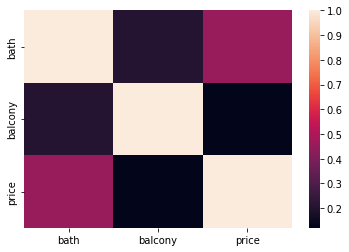

In [7]:
sns.heatmap(df.corr())


In [8]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [9]:
l=list(df.columns)  
l1=[]
l2=[]

for i in l:
   if df.loc[:,i].dtype == "float":
      l1.append(i)
   elif df.loc[:,i].dtype == "object":
      l2.append(i)
   
print(l1)
print(l2)


['bath', 'balcony', 'price']
['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


In [10]:
catvariables=['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [11]:
df.area_type.value_counts()


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [12]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
pd.Series(df.availability.unique()).head(50)

0                   19-Dec
1            Ready To Move
2                   18-May
3                   18-Feb
4                   18-Nov
5                   20-Dec
6                   17-Oct
7                   21-Dec
8                   19-Sep
9                   20-Sep
10                  18-Mar
11                  20-Feb
12                  18-Apr
13                  20-Aug
14                  18-Oct
15                  19-Mar
16                  17-Sep
17                  18-Dec
18                  17-Aug
19                  19-Apr
20                  18-Jun
21                  22-Dec
22                  22-Jan
23                  18-Aug
24                  19-Jan
25                  17-Jul
26                  18-Jul
27                  21-Jun
28                  20-May
29                  19-Aug
30                  18-Sep
31                  17-May
32                  17-Jun
33                  21-May
34                  18-Jan
35                  20-Mar
36                  17-Dec
3

In [14]:
df.location.value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [15]:
len(df.location.unique())

1306

In [16]:
len(df.society.unique())

2689

In [17]:
df.society.value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [126]:
continuos_variables=['bath', 'balcony', 'price']


In [4]:
def is_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [5]:
df[df['total_sqft'].apply(is_num)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df[~df['total_sqft'].apply(is_num)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [7]:
def convert_to_num(v):
     val = v.split('-')
     if (len(val)) == 2:
        return ((float(val[0]) + float(val[1]))/2)
     try:
        return float(v)
     except:
        return None

In [8]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_num)

In [9]:
df.total_sqft.dtype

dtype('float64')

In [10]:
df['price'] = df1['price']
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [15]:
t.dtypes

area_type               object
availabilitysociety     object
location                object
size                    object
society                 object
total_sqft              object
bath                     int64
balcony                float64
dtype: object

In [52]:
t[t['total_sqft'].apply(is_num)]
t[~t['total_sqft'].apply(is_num)]


,area_type,availability,location,size,society,total_sqft,bath,balcony
3,Super built-up Area,2022-05-19 00:00:00,Sarjapur Road,3 BHK,Klark L,1446 - 1506,NaN,NaN
10,Super built-up Area,2022-12-18 00:00:00,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0


In [53]:
def convert_to_num(v):
     val = v.split('-')
     if (len(val)) == 2:
        return ((float(val[0]) + float(val[1]))/2)
     try:
        return float(v)
     except:
        return None
    

In [54]:
t['total_sqft'] = t['total_sqft'].astype(str).apply(convert_to_num)

In [55]:
t.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
dtype: object

In [133]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [134]:
# location null -drop
# size null -drop
# bath null - drop
# balcony -drop
# society - rplace by mode

In [135]:
df.isnull().sum()/len(df)

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.003453
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [56]:
t.isnull().sum()/len(t)

area_type       0.00
availability    0.00
location        0.00
size            0.00
society         0.50
total_sqft      0.00
bath            0.05
balcony         0.15
dtype: float64

In [136]:
# checking skewness
print(df.bath.skew())
print(df.balcony.skew())
print(df.total_sqft.skew())


4.227696763299001
0.005856767469113565
15.267335905766558


<AxesSubplot:xlabel='bath'>

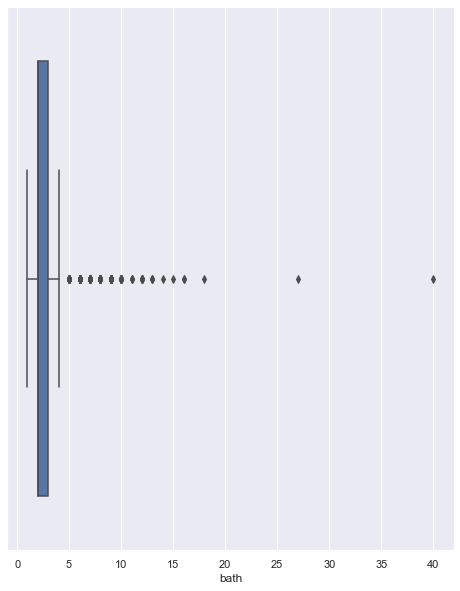

In [137]:
# checking outliers
sns.boxplot(df.bath)

<AxesSubplot:xlabel='total_sqft'>

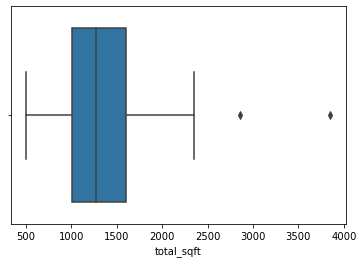

In [57]:
sns.boxplot(t.total_sqft)

<AxesSubplot:xlabel='balcony'>

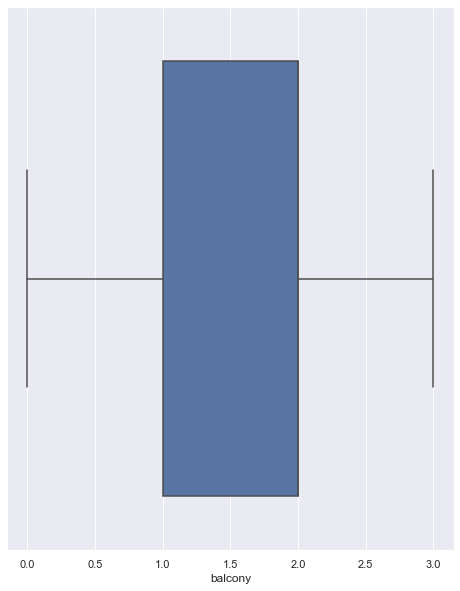

In [138]:
sns.boxplot(df.balcony)

<AxesSubplot:xlabel='total_sqft'>

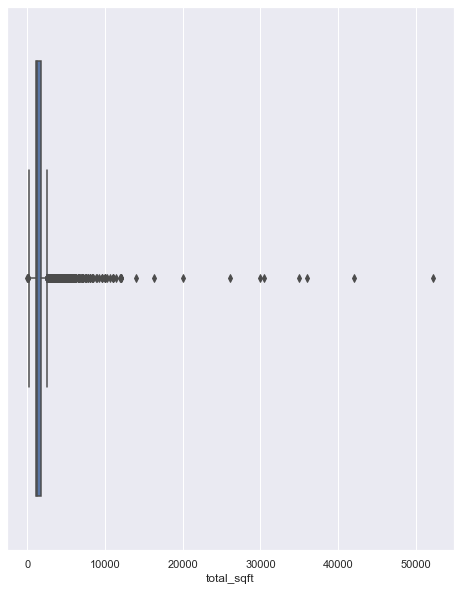

In [139]:
sns.boxplot(df.total_sqft)

# data cleaning


In [24]:
df.drop("society",axis=1,inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [58]:
t= t.drop("society",axis =1)

In [25]:
df.balcony.fillna(df.balcony.median(),inplace=True)

In [59]:
t.balcony.fillna(t.balcony.median(),inplace=True)

In [28]:
df.bath.fillna(df.bath.median(),inplace=True)

In [29]:
df.total_sqft.fillna(df.total_sqft.median(),inplace=True)

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [60]:
t=t.dropna()

In [61]:
# society column has 38% nan values, so remove this column.

In [62]:
# outlier treatment


In [36]:
pip install feature_engine

In [37]:
from feature_engine.outliers import Winsorizer
win= Winsorizer(capping_method='iqr',tail="both",fold=1.5,variables=["bath","total_sqft"])
df[["bath","total_sqft"]]=win.fit_transform(df[["bath","total_sqft"]])

In [38]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'bath': 0.5, 'total_sqft': 237.5} {'bath': 4.5, 'total_sqft': 2537.5}


<AxesSubplot:xlabel='total_sqft'>

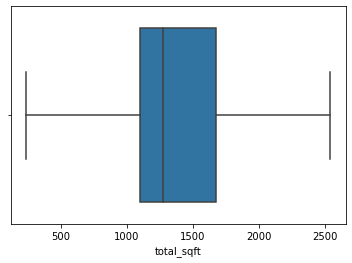

In [39]:
sns.boxplot(df.total_sqft)

# data wrangling

In [40]:
df.bath.skew()                                   # after datacleaning no rightskewness 

0.6887637540639532

In [41]:
df.total_sqft.skew()

0.7625797196716432

In [42]:
df.balcony.skew()

-0.057032451966706185

# encoding

In [43]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [44]:
catvar = ['area_type', 'availability', 'location', 'bhk']

In [45]:
area_encoder={'Super built-up  Area':3 ,'Plot  Area':4 ,'Built-up  Area':2,'Carpet  Area':1}
df['area_type']=df['area_type'].map(area_encoder).astype(np.float64)

In [69]:
area_encoder={'Super built-up  Area':3 ,'Plot  Area':4 ,'Built-up  Area':2,'Carpet  Area':1}
t['area_type']=t['area_type'].map(area_encoder).astype(np.float64)

In [47]:
availability_enco={df['availability'].unique()[i]:0 for i in range(len(df['availability'].unique()))}
availability_enco['Ready To Move']=1
availability_enco['Immediate Possession']=1
df['availability']=df['availability'].map(availability_enco)


In [63]:
availability_enco={t['availability'].unique()[i]:0 for i in range(len(t['availability'].unique()))}
availability_enco['Ready To Move']=1
availability_enco['Immediate Possession']=1
t['availability']=t['availability'].map(availability_enco)


In [64]:
sizes = list(df["size"].unique())
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[sizes])
df['size']=oe.fit_transform(df['size'].to_numpy().reshape(-1,1))

In [65]:
sizes = list(t["size"].unique())
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[sizes])
t['size']=oe.fit_transform(t['size'].to_numpy().reshape(-1,1))

In [71]:
items1 = df["location"].unique()
items_map1 = {i:val for i,val in enumerate(items1)}
inverse_items_map1 = {val:i for i,val in enumerate(items1)}

df["location"]=df["location"].map(inverse_items_map1)
df["location"].head(n=15)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10     5
11     5
12    10
13    11
14    12
Name: location, dtype: int64

In [72]:
items1 = t["location"].unique()
items_map1 = {i:val for i,val in enumerate(items1)}
inverse_items_map1 = {val:i for i,val in enumerate(items1)}

t["location"]=t["location"].map(inverse_items_map1)
t["location"].head(n=15)

0      0
1      1
2      2
4      3
5      4
6      5
7      6
8      7
9      1
10     1
11     8
12     9
13    10
14    11
15    12
Name: location, dtype: int64

In [73]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3.0,0,0,0.0,1056.0,2.0,1.0,39.07
1,4.0,1,1,1.0,2537.5,4.5,3.0,120.00
2,2.0,1,2,2.0,1440.0,2.0,3.0,62.00
3,3.0,1,3,2.0,1521.0,3.0,1.0,95.00
4,3.0,1,4,0.0,1200.0,2.0,1.0,51.00


In [74]:
t.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,4.0,1,0,0.0,1200.0,2.0,0.0
1,3.0,0,1,1.0,1346.0,2.0,1.0
2,3.0,0,2,2.0,630.0,1.0,0.0
4,3.0,1,3,3.0,1850.0,3.0,2.0
5,4.0,1,4,4.0,2350.0,2.0,0.0


<AxesSubplot:>

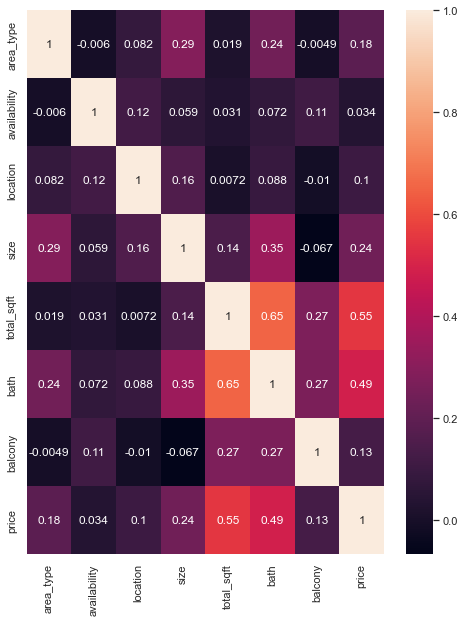

In [75]:
sns.set(rc = {'figure.figsize':(8,10)})
sns.heatmap(df.corr(),annot=True)

# X and y

In [76]:
X= df.drop(columns=["price"])
y = df[["price"]]


In [77]:
X.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,3.0,0,0,0.0,1056.0,2.0,1.0
1,4.0,1,1,1.0,2537.5,4.5,3.0
2,2.0,1,2,2.0,1440.0,2.0,3.0
3,3.0,1,3,2.0,1521.0,3.0,1.0
4,3.0,1,4,0.0,1200.0,2.0,1.0


In [78]:
y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV



In [80]:
def find_best_model(X,y):
    models = {
        "linear_regression":{"model": LinearRegression(),"parameters":{"normalize":[True,False]}},
            "lasso":{"model": Lasso(),"parameters":{"alpha":[1,2,3]}},
           "decesion_tree":{"model": DecisionTreeRegressor(),"parameters":{"criterion":["squared_error", "friedman_mse"],"splitter":["random","best"]}},
           "random_forest":{"model":RandomForestRegressor(),"parameters":{"criterion":["squared_error", "friedman_mse"],"n_estimators":[5,10,15,20,25]}},
            "kn_neighbor":{"model": KNeighborsRegressor(),"parameters":{"algorithm" : ['auto', 'ball_tree'],"n_neighbors":[2,5,10,15,20]}},
           "XGB":{"model":XGBRegressor(),"parameters":{'learning_rate': [0.01, 0.1],'max_depth': [3, 5, 7, 10],'n_estimators' : [100, 200, 500]}}
          }
    scores = []
    for model_name , model_params in models.items() :
         gs = GridSearchCV(model_params["model"],model_params["parameters"] , cv=5, return_train_score=False)
         gs.fit(X,y)
         scores.append({"model":model_name,"best_params":gs.best_params_,"best_score":gs.best_score_})
    
    return pd.DataFrame(scores,columns=["model","best_params","best_score"]) 


In [81]:
find_best_model(X,y)


,model,best_params,best_score
0,linear_regression,{'normalize': True},0.368630
1,lasso,{'alpha': 1},0.368583
2,decesion_tree,"{'criterion': 'squared_error', 'splitter': 'be...",0.182731
3,random_forest,"{'criterion': 'friedman_mse', 'n_estimators': 25}",0.467417
4,kn_neighbor,"{'algorithm': 'auto', 'n_neighbors': 15}",0.415196
5,XGB,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.557157


In [83]:
D=find_best_model(X,y)


In [84]:
a=D.loc[5,["best_params"]]
list(a)

[{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}]

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:
pip install xgboost

In [87]:
from xgboost import XGBRegressor
model_xgb= XGBRegressor(learning_rate= 0.1, max_depth = 5, n_estimators=500)
model_xgb.fit(X_train,y_train)
train_pred = model_xgb.predict(X_train)
test_pred =model_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE_test= np.sqrt(mean_squared_error(y_test,test_pred))
RMSE_train= np.sqrt(mean_squared_error(y_train,train_pred))
print("rmse test ",RMSE_test,"rmse train ",RMSE_train)

print("r2 train ",model_xgb.score(X_train,y_train)) 
print("r2 test ",model_xgb.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
scores= cross_val_score(model_xgb,X,y,cv=5)
print(scores)
print("crossvalidation score is :",scores.mean())

rmse test  106.73609542518768 rmse train  41.057451254597744
r2 train  0.9223271353393603
r2 test  0.5287648173168695
[0.61033452 0.5637249  0.57182192 0.51802566 0.52187836]
crossvalidation score is : 0.5571570722956809


In [89]:
model_xgb.feature_importances_

array([0.11796938, 0.17088264, 0.10599817, 0.06675389, 0.32048422,
       0.16142873, 0.05648305], dtype=float32)

In [92]:
X_new=X.drop(columns=["size","balcony"])

In [93]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=0)

In [108]:
from xgboost import XGBRegressor
model_xgb2= XGBRegressor(learning_rate= 0.1, max_depth = 5, n_estimators=500)
model_xgb2.fit(X_train1,y_train)
train_pred = model_xgb2.predict(X_train1)
test_pred =model_xgb2.predict(X_test1)

from sklearn.metrics import mean_squared_error
RMSE_test= np.sqrt(mean_squared_error(y_test,test_pred))
RMSE_train= np.sqrt(mean_squared_error(y_train,train_pred))
print("rmse test ",RMSE_test,"rmse train ",RMSE_train)

print("r2 train ",model_xgb2.score(X_train1,y_train)) 
print("r2 test ",model_xgb2.score(X_test1,y_test))

from sklearn.model_selection import cross_val_score
scores= cross_val_score(model_xgb2,X_new,y,cv=5)
print(scores)
print("crossvalidation score is :",scores.mean())

rmse test  107.25838345676472 rmse train  48.09295512873435
r2 train  0.8934267332869392
r2 test  0.524141776508952
[0.59577678 0.60431065 0.53054804 0.57421338 0.50916244]
crossvalidation score is : 0.56280225773721


In [95]:
model_xgb2.feature_importances_

array([0.12782127, 0.17927475, 0.1405454 , 0.37584767, 0.17651087],
      dtype=float32)

In [106]:
param_grid= {'n_estimators': [50,65,80,100,115,130,150],"max_depth":[2,3,4,5],"learning_rate":[0.3,0.2,0.1,0.01]}
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(model_xgb,param_grid,cv=5,scoring="accuracy")
grid.fit(X_train1,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=5, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=500,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'learning_rate': [0.3, 0.2, 0.1, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 65, 80, 100, 115, 130, 150]},
             scoring='accuracy')

In [107]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 50}

In [109]:
from xgboost import XGBRegressor
model_xgb2= XGBRegressor(learning_rate= 0.3, max_depth = 2, n_estimators=50)
model_xgb2.fit(X_train1,y_train)
train_pred = model_xgb2.predict(X_train1)
test_pred =model_xgb2.predict(X_test1)

from sklearn.metrics import mean_squared_error
RMSE_test= np.sqrt(mean_squared_error(y_test,test_pred))
RMSE_train= np.sqrt(mean_squared_error(y_train,train_pred))
print("rmse test ",RMSE_test,"rmse train ",RMSE_train)

print("r2 train ",model_xgb2.score(X_train1,y_train)) 
print("r2 test ",model_xgb2.score(X_test1,y_test))

from sklearn.model_selection import cross_val_score
scores= cross_val_score(model_xgb2,X_new,y,cv=5)
print(scores)
print("crossvalidation score is :",scores.mean())

rmse test  112.0969573713198 rmse train  100.99034618608898
r2 train  0.5300571215234775
r2 test  0.4802401432705806
[0.54044279 0.48973441 0.50938423 0.46014832 0.39601736]
crossvalidation score is : 0.47914542246014236


In [113]:
t_new = t.drop(columns=["size","balcony"])

##### final model is XGB model with HPT

In [110]:
# save the final model
from joblib import dump
dump(model_xgb2,"house_price.joblib")

['house_price.joblib']

In [111]:
# load the model
from joblib import load
load_model = load('house_price.joblib')

###### predicting house prices with our trained model

In [114]:
# t_new is the data  to predict house price
house_price_predictions = load_model.predict(t_new)    

In [115]:
house_price_predictions

array([ 14.50381 ,  46.062668,  24.111092, 106.43157 , 312.00244 ,
        38.960434, 141.15538 , 166.3153  , 307.365   , 307.365   ,
       198.94254 ,  89.2788  ,  55.850998, 128.28882 ,  43.6471  ,
        33.40351 , 171.62997 , 106.98355 ,  84.94301 ], dtype=float32)